# Финальный проект

Небольшая статистика по проектам на основе лидербордов соревнований kaggle inclass

In [1]:
from operator import itemgetter
from itertools import groupby
from bs4 import BeautifulSoup
import requests

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Ссылки с лидербордами соревнований

In [2]:
urls = {1: 'https://inclass.kaggle.com/c/identify-me-if-you-can-yandex-mipt/leaderboard',
        2: 'https://inclass.kaggle.com/c/telecom-clients-churn-prediction/leaderboard',
        3: 'https://inclass.kaggle.com/c/yellowtaxi/leaderboard',
        5: 'https://inclass.kaggle.com/c/product-reviews-sentiment-analysis-light/leaderboard',
        6: 'https://inclass.kaggle.com/c/product-reviews-sentiment-analysis/leaderboard'}

Скачаем списки студентов с лидербордов и добавим в словарь проект - студенты  
В 4ый проект включим пересечение лидербордов 4.1 и 4.2

In [3]:
projects = {}
for i in urls:
    r = requests.get(urls[i])
    soup = BeautifulSoup(r.text, "lxml")
    results = soup.findAll("a", {"class" : "team-link single-player"})
    results = [result['href'].split('/')[-1] for result in results]
    projects[i] = results
    
# 4 курс будем считать как объединение 4.1 и 4.2
projects[4] = list(set(projects[5] + projects[6]))
del projects[5], projects[6]

Составим обратный словарь студент - проекты

In [4]:
students = dict((x, list(t[1] for t in group))
                for (x, group) in groupby(sorted(((j, k) for k, v in projects.items()
                                                  for j in v), key=itemgetter(0)), key=itemgetter(0)))

In [5]:
print('Всего студентов: {}'.format(len(students)))

Всего студентов: 118


Если не считать автора первого проекта Юрия Кашницкого, то получается 117.

## Количество студентов в каждом проекте

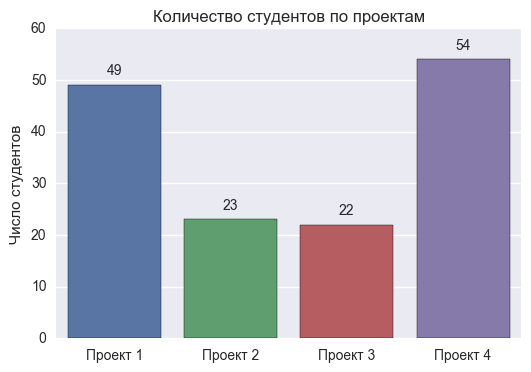

In [6]:
x = ['Проект ' + str(i) for i in range(1, 5)]
y = [len(projects[i]) for i in range(1, 5)]
ax = sns.barplot(x=x, y=y)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 2, '{:.0f}'.format(height), ha='center')
plt.title('Количество студентов по проектам')
plt.ylabel('Число студентов')
plt.show()

## Количество студентов, делающих N проектов

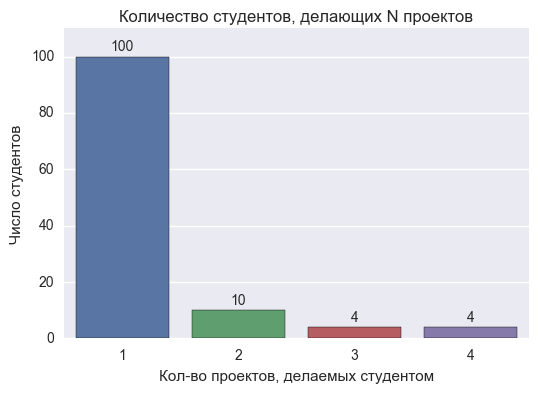

In [7]:
ax = sns.countplot([len(i) for i in students.values()])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 2, '{:.0f}'.format(height), ha='center')
plt.title('Количество студентов, делающих N проектов')
plt.ylabel('Число студентов')
plt.xlabel('Кол-во проектов, делаемых студентом')
plt.ylim(0, 110)
plt.show()

Студенты, делающие **все 4 проекта**:

In [8]:
print(*sorted([i for i in students if len(students[i]) == 4]), sep='\n')

ilyenkov
rumatch
sdil87
vadamoto


Студенты, делающие **3 проекта**:

In [9]:
print(*sorted([i for i in students if len(students[i]) == 3]), sep='\n')

artemzaika
hydrophisspiralis
teisintai
vanaev


## Диаграмма Венна

Число студентов, делающих только один, какие-либо два и т.д. проекты

Диаграмма сделана здесь: http://bioinfogp.cnb.csic.es/tools/venny/index.html

![alt text](venn.png "Title")